In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
my_data = pd.read_csv('livechatlog_GvXDQs_00IA.tsv', sep='\t',  header=None)

In [32]:
my_data.head()

,0,1,2,3,4,5,6
0,livechatlog_GvXDQs_00IA,1,NORMALCHAT,M T,-1:13:47,0,待ってたよ😆
1,livechatlog_GvXDQs_00IA,2,NORMALCHAT,池田望,-53:35,0,めちゃ楽しみです♪
2,livechatlog_GvXDQs_00IA,3,NORMALCHAT,HOLY HOLY,-52:10,0,リラックスしてくださいね♪観る方もリラックスしてますから♪
3,livechatlog_GvXDQs_00IA,4,NORMALCHAT,爆食ますぶちさちよ,-34:39,0,あと30分…‼️
4,livechatlog_GvXDQs_00IA,5,NORMALCHAT,うおニンジャ,-33:02,0,あと30分！楽しみです🥰


In [33]:
#時間の負号だけ別にする
my_data[7] = [-1 if s[0] == '-' else 1 for s in my_data[4]]
my_data[4] = [s.replace('-', '') for s in my_data[4]]
my_data[4] = [f'0:{s}' if len(s) <= 5 else s for s in my_data[4]]
my_data.head()

,0,1,2,3,4,5,6,7
0,livechatlog_GvXDQs_00IA,1,NORMALCHAT,M T,1:13:47,0,待ってたよ😆,-1
1,livechatlog_GvXDQs_00IA,2,NORMALCHAT,池田望,0:53:35,0,めちゃ楽しみです♪,-1
2,livechatlog_GvXDQs_00IA,3,NORMALCHAT,HOLY HOLY,0:52:10,0,リラックスしてくださいね♪観る方もリラックスしてますから♪,-1
3,livechatlog_GvXDQs_00IA,4,NORMALCHAT,爆食ますぶちさちよ,0:34:39,0,あと30分…‼️,-1
4,livechatlog_GvXDQs_00IA,5,NORMALCHAT,うおニンジャ,0:33:02,0,あと30分！楽しみです🥰,-1


In [46]:
#経過時間を秒で表す
tmp = pd.to_datetime(my_data[4], format='%H:%M:%S') - pd.to_datetime('1900-01-01 00:00:00')
my_data[8] = [d.seconds for d in tmp]
my_data[8] = my_data[8] * my_data[7]
my_data.head()

,0,1,2,3,4,5,6,7,8
0,livechatlog_GvXDQs_00IA,1,NORMALCHAT,M T,1:13:47,0,待ってたよ😆,-1,-4427
1,livechatlog_GvXDQs_00IA,2,NORMALCHAT,池田望,0:53:35,0,めちゃ楽しみです♪,-1,-3215
2,livechatlog_GvXDQs_00IA,3,NORMALCHAT,HOLY HOLY,0:52:10,0,リラックスしてくださいね♪観る方もリラックスしてますから♪,-1,-3130
3,livechatlog_GvXDQs_00IA,4,NORMALCHAT,爆食ますぶちさちよ,0:34:39,0,あと30分…‼️,-1,-2079
4,livechatlog_GvXDQs_00IA,5,NORMALCHAT,うおニンジャ,0:33:02,0,あと30分！楽しみです🥰,-1,-1982


In [67]:
#金額を数値にし，累積値を計算する
my_data[9] = [int(s.replace('¥', '').replace(',', '')) for s in my_data[5]] #金額
my_data[10] = np.cumsum(my_data[9]) #累積
my_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,livechatlog_GvXDQs_00IA,1,NORMALCHAT,M T,1:13:47,0,待ってたよ😆,-1,-4427,0,0
1,livechatlog_GvXDQs_00IA,2,NORMALCHAT,池田望,0:53:35,0,めちゃ楽しみです♪,-1,-3215,0,0
2,livechatlog_GvXDQs_00IA,3,NORMALCHAT,HOLY HOLY,0:52:10,0,リラックスしてくださいね♪観る方もリラックスしてますから♪,-1,-3130,0,0
3,livechatlog_GvXDQs_00IA,4,NORMALCHAT,爆食ますぶちさちよ,0:34:39,0,あと30分…‼️,-1,-2079,0,0
4,livechatlog_GvXDQs_00IA,5,NORMALCHAT,うおニンジャ,0:33:02,0,あと30分！楽しみです🥰,-1,-1982,0,0


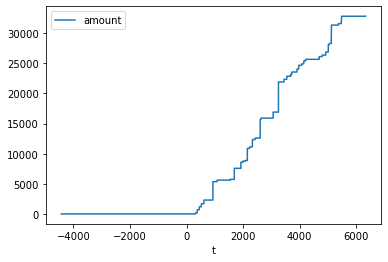

In [68]:
#経過時間と累積金額をグラフにする
pd.DataFrame({'t':my_data[8], 'amount':my_data[10]}).plot(x='t')

In [73]:
#スパチャの統計
superchats = my_data[my_data[9] != 0]
superchats[9].describe()

count      40.00000
mean      820.25000
std      1056.45631
min       100.00000
25%       250.00000
50%       370.00000
75%      1000.00000
max      5000.00000
Name: 9, dtype: float64

(array([27.,  4.,  3.,  2.,  0.,  0.,  3.,  0.,  0.,  1.]),
 array([ 100.,  590., 1080., 1570., 2060., 2550., 3040., 3530., 4020.,
        4510., 5000.]),
 <a list of 10 Patch objects>)

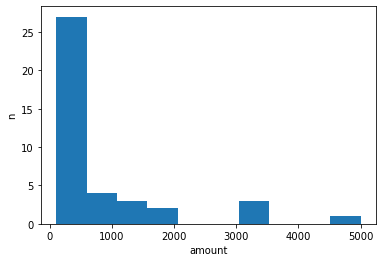

In [76]:
plt.xlabel('amount')
plt.ylabel('n')
plt.hist(superchats[9])